In [26]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/Users/poojakantheti/Downloads/vgsales.csv") 

In [28]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [30]:
print(df['Name'].isnull().values.any())
print(df['Platform'].isnull().values.any())
print(df['Year'].isnull().values.any())
print(df['Genre'].isnull().values.any())
print(df['Publisher'].isnull().values.any())
print(df['NA_Sales'].isnull().values.any())
print(df['EU_Sales'].isnull().values.any())
print(df['JP_Sales'].isnull().values.any())
print(df['Other_Sales'].isnull().values.any())
print(df['Global_Sales'].isnull().values.any())

False
False
True
False
True
False
False
False
False
False


In [31]:
print(df['Year'].isnull().sum())
print(df['Publisher'].isnull().sum())

271
58


In [32]:
df = df.dropna(axis=0, subset=['Year','Publisher'])

In [33]:
df.isnull().values.any()

False

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


In [37]:
print("Number of games: ", len(df))
publishers = df['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = df['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres =df['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16291
Number of publishers:  576
Number of platforms:  31
Number of genres:  12


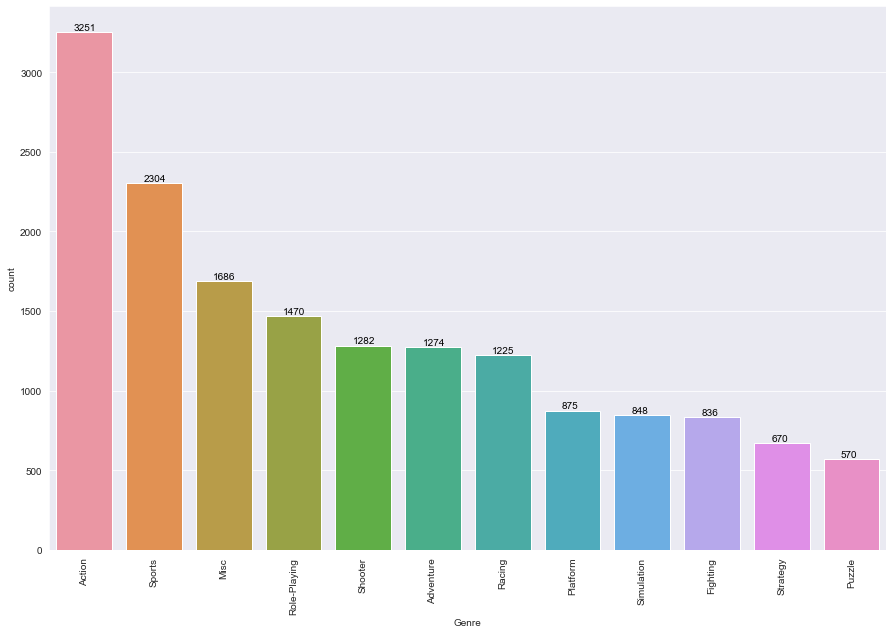

In [55]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

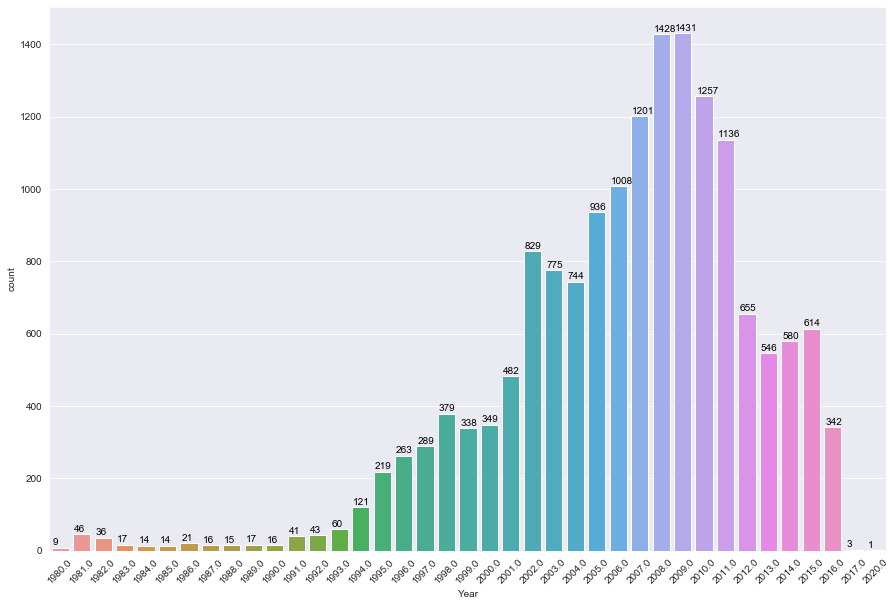

In [44]:
plt.figure(figsize=(15,10))
ax=sns.countplot(df.Year)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.05, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

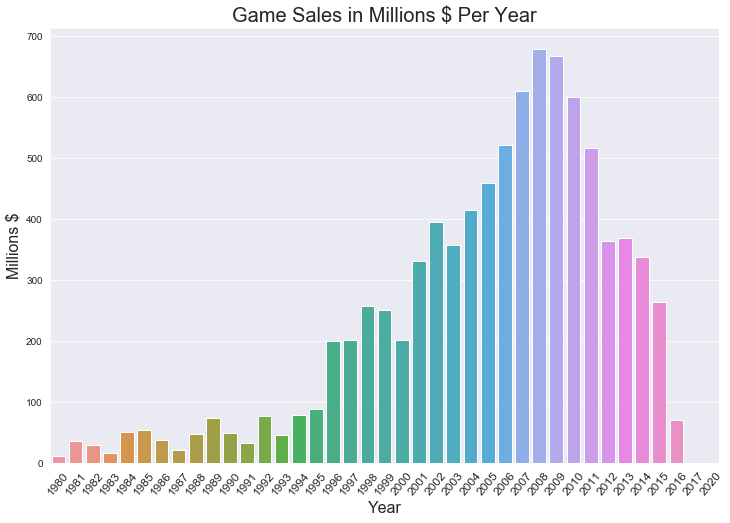

In [45]:
y = df.groupby(['Year'])['Global_Sales'].sum()
x = y.index.astype(int)
plt.figure(figsize=(12,8))
ax=sns.barplot(y = y, x = x)
plt.xlabel(xlabel='Year', fontsize=16)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='Millions $', fontsize=16)
plt.title(label='Game Sales in Millions $ Per Year', fontsize=20)
plt.show()

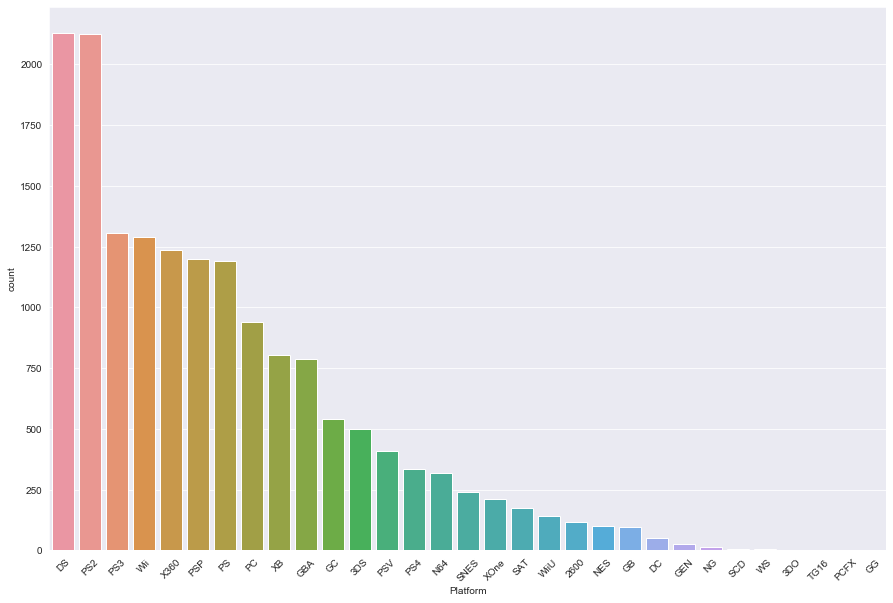

In [56]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot( x="Platform", data=df, order = df['Platform'].value_counts().index)
plt.show()

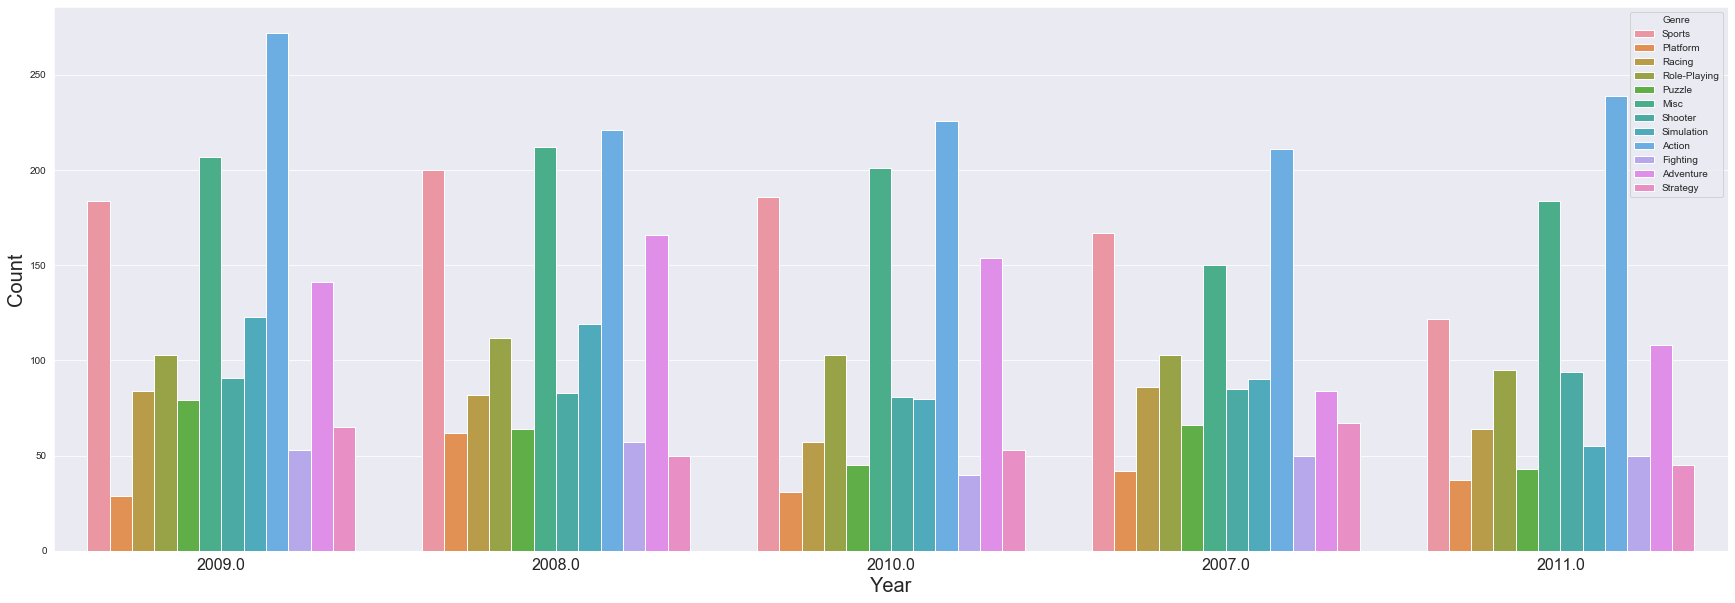

In [57]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16)
plt.xlabel(xlabel='Year', fontsize=20)
plt.ylabel(ylabel='Count', fontsize=20)
plt.show()

In [54]:
df_genre = df.groupby(by=['Genre'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

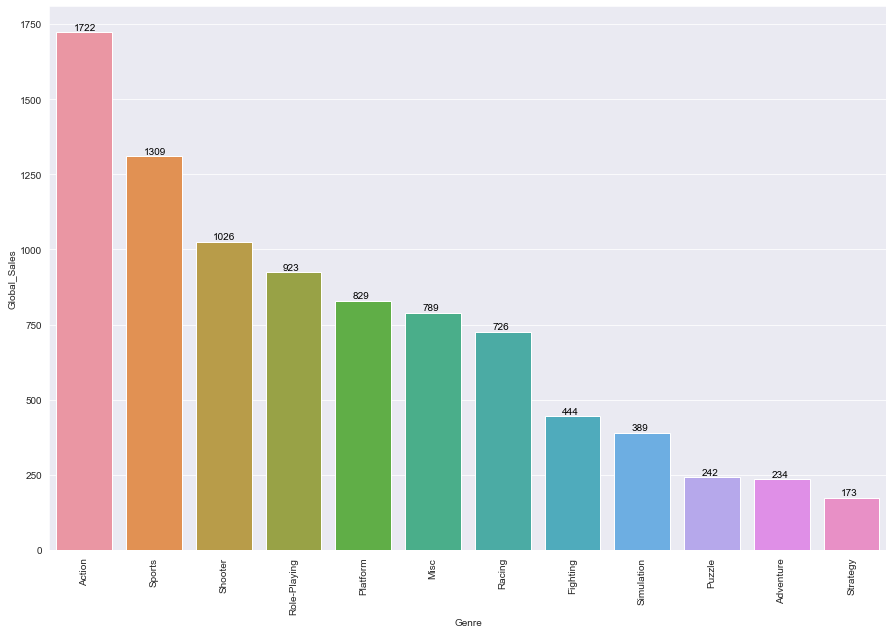

In [58]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x="Genre", y="Global_Sales", data=df_genre)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

In [69]:
dataYear=df["Year"].dropna().unique()
dataYear.sort()

In [73]:
na=[]
eu=[]
jp=[]
other=[]
glbl=[]

for i in dataYear:
    x=df[df["Year"]==i]
    
    na.append(sum(x["NA_Sales"]))
    eu.append(sum(x["EU_Sales"]))
    jp.append(sum(x["JP_Sales"]))
    other.append(sum(x["Other_Sales"]))
    glbl.append(sum(x["Global_Sales"]))
 
yearSales=pd.DataFrame({"Year":dataYear, "NA":na, "EU":eu, "JP":jp, "Other":other, "Global":glbl})
yearSales["Year"].astype("int64")

yearSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    39 non-null     float64
 1   NA      39 non-null     float64
 2   EU      39 non-null     float64
 3   JP      39 non-null     float64
 4   Other   39 non-null     float64
 5   Global  39 non-null     float64
dtypes: float64(6)
memory usage: 2.0 KB


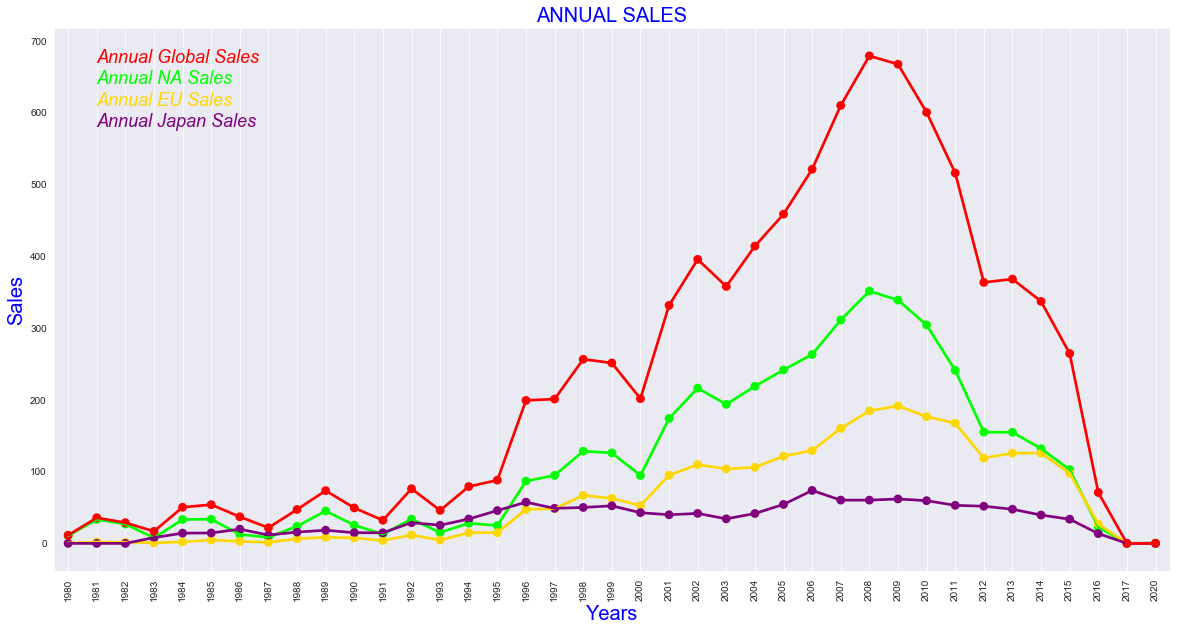

In [74]:
yearSales["Year"]=yearSales.Year.astype("int64")

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x="Year",y="NA" ,data=yearSales,color='lime',alpha=0.8)
sns.pointplot(x="Year",y="EU",data=yearSales,color='gold',alpha=0.8)
sns.pointplot(x="Year",y="JP",data=yearSales,color='purple',alpha=0.8)
sns.pointplot(x="Year",y="Global",data=yearSales,color='red',alpha=0.8)
plt.text(1,670,'Annual Global Sales',color='red',fontsize = 18,style = 'italic')
plt.text(1,640,'Annual NA Sales',color='lime',fontsize = 18,style = 'italic')
plt.text(1,610,'Annual EU Sales',color='gold',fontsize = 18,style = 'italic')
plt.text(1,580,'Annual Japan Sales',color='purple',fontsize = 18,style = 'italic')
plt.xticks(rotation=90)
plt.xlabel('Years',fontsize = 20,color='blue')
plt.ylabel('Sales',fontsize = 20,color='blue')
plt.title('ANNUAL SALES',fontsize = 20,color='blue')
plt.grid()


In [63]:
df_platform = df.groupby(by=['Platform'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

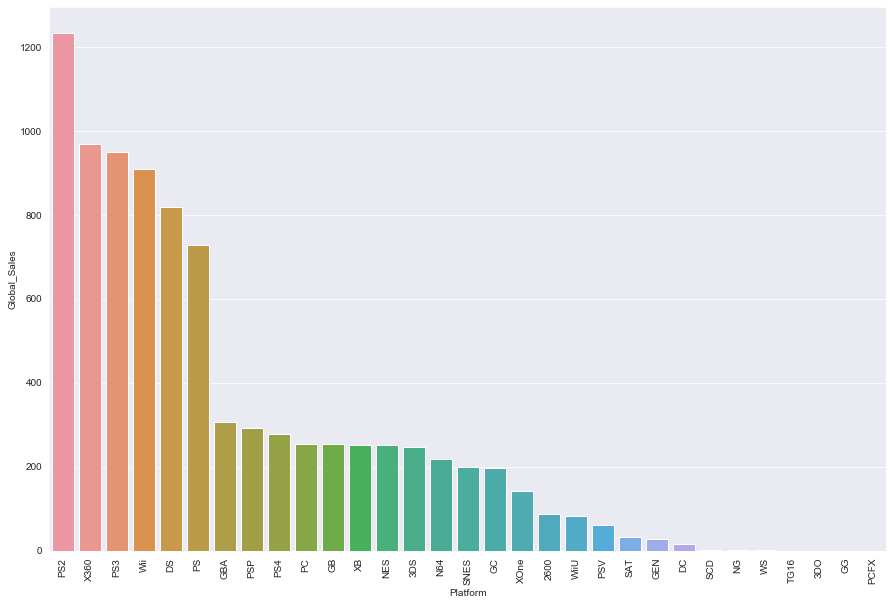

In [77]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=df_platform)
plt.xticks(rotation=90)
plt.show()

In [78]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

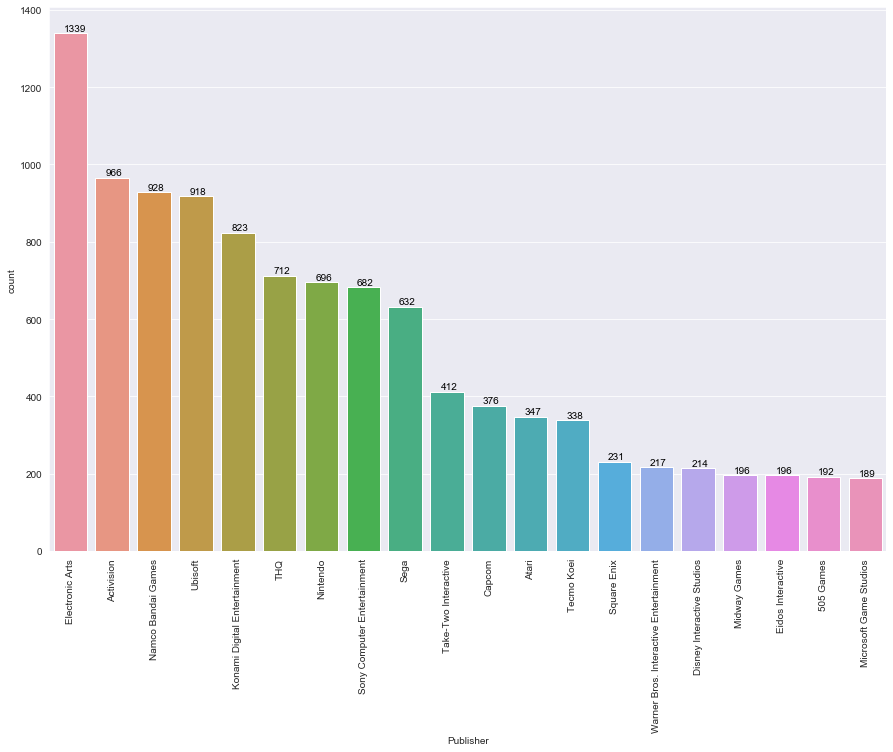

In [79]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
